In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
df = pd.read_csv('/gdrive/My Drive/immo_data.csv')
df.head(5)

,regio1,serviceCharge,heatingType,telekomTvOffer,telekomHybridUploadSpeed,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,noParkSpaces,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3,description,facilities,heatingCosts,energyEfficiencyClass,lastRefurbish,electricityBasePrice,electricityKwhPrice,date
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,NaN,False,False,6,4.62,10.0,840.0,1965.0,96107057,1.0,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren,Die ebenerdig zu erreichende Erdgeschosswohnun...,Die Wohnung ist mit Laminat ausgelegt. Das Bad...,NaN,NaN,NaN,NaN,NaN,May19
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,NaN,False,True,8,3.47,10.0,NaN,1871.0,111378734,2.0,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim,Alles neu macht der Mai – so kann es auch für ...,NaN,NaN,NaN,2019.0,NaN,NaN,May19
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,10.0,True,True,8,2.72,2.4,1300.0,2019.0,113147523,1.0,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt,Der Neubau entsteht im Herzen der Dresdner Neu...,"* 9 m² Balkon\n* Bad mit bodengleicher Dusche,...",NaN,NaN,NaN,NaN,NaN,Oct19
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,NaN,False,True,9,1.53,40.0,NaN,1964.0,108890903,NaN,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg,Abseits von Lärm und Abgasen in Ihre neue Wohn...,NaN,87.23,NaN,NaN,NaN,NaN,May19
4,Bremen,138.00,self_contained_central_heating,NaN,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,NaN,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen,Es handelt sich hier um ein saniertes Mehrfami...,Diese Wohnung wurde neu saniert und ist wie fo...,NaN,NaN,NaN,NaN,NaN,Feb20


In [4]:
df.shape

(268850, 49)

# Data Preprocessing

### delete columns without useful information

In [5]:
df = df.drop(columns=['description','facilities', 'date'])

In [6]:
df.shape

(268850, 46)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268850 entries, 0 to 268849
Data columns (total 46 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   regio1                    268850 non-null  object 
 1   serviceCharge             261941 non-null  float64
 2   heatingType               223994 non-null  object 
 3   telekomTvOffer            236231 non-null  object 
 4   telekomHybridUploadSpeed  45020 non-null   float64
 5   newlyConst                268850 non-null  bool   
 6   balcony                   268850 non-null  bool   
 7   picturecount              268850 non-null  int64  
 8   pricetrend                267018 non-null  float64
 9   telekomUploadSpeed        235492 non-null  float64
 10  totalRent                 228333 non-null  float64
 11  yearConstructed           211805 non-null  float64
 12  scoutId                   268850 non-null  int64  
 13  noParkSpaces              93052 non-null   f

### nan values

In [8]:
df.isna().sum()/len(df)

regio1                      0.000000
serviceCharge               0.025698
heatingType                 0.166844
telekomTvOffer              0.121328
telekomHybridUploadSpeed    0.832546
newlyConst                  0.000000
balcony                     0.000000
picturecount                0.000000
pricetrend                  0.006814
telekomUploadSpeed          0.124077
totalRent                   0.150705
yearConstructed             0.212182
scoutId                     0.000000
noParkSpaces                0.653889
firingTypes                 0.211880
hasKitchen                  0.000000
geo_bln                     0.000000
cellar                      0.000000
yearConstructedRange        0.212182
baseRent                    0.000000
houseNumber                 0.264155
livingSpace                 0.000000
geo_krs                     0.000000
condition                   0.254748
interiorQual                0.419063
petsAllowed                 0.426160
street                      0.000000
s

In [9]:
df.columns[((df.isna().sum()/len(df)) > 0.50)]

Index(['telekomHybridUploadSpeed', 'noParkSpaces', 'heatingCosts',
       'energyEfficiencyClass', 'lastRefurbish', 'electricityBasePrice',
       'electricityKwhPrice'],
      dtype='object')

In [10]:
df = df.drop(columns=df.columns[((df.isna().sum()/len(df)) > 0.50)])
df.columns

Index(['regio1', 'serviceCharge', 'heatingType', 'telekomTvOffer',
       'newlyConst', 'balcony', 'picturecount', 'pricetrend',
       'telekomUploadSpeed', 'totalRent', 'yearConstructed', 'scoutId',
       'firingTypes', 'hasKitchen', 'geo_bln', 'cellar',
       'yearConstructedRange', 'baseRent', 'houseNumber', 'livingSpace',
       'geo_krs', 'condition', 'interiorQual', 'petsAllowed', 'street',
       'streetPlain', 'lift', 'baseRentRange', 'typeOfFlat', 'geo_plz',
       'noRooms', 'thermalChar', 'floor', 'numberOfFloors', 'noRoomsRange',
       'garden', 'livingSpaceRange', 'regio2', 'regio3'],
      dtype='object')

In [11]:
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3
0,Nordrhein_Westfalen,245.00,central_heating,ONE_YEAR_FREE,False,False,6,4.62,10.0,840.0,1965.0,96107057,oil,False,Nordrhein_Westfalen,True,2.0,595.0,244,86.00,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,4,ground_floor,44269,4.0,181.4,1.0,3.0,4,True,4,Dortmund,Schüren
1,Rheinland_Pfalz,134.00,self_contained_central_heating,ONE_YEAR_FREE,False,True,8,3.47,10.0,NaN,1871.0,111378734,gas,False,Rheinland_Pfalz,False,1.0,800.0,NaN,89.00,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,5,ground_floor,67459,3.0,NaN,NaN,NaN,3,False,4,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,Sachsen,255.00,floor_heating,ONE_YEAR_FREE,True,True,8,2.72,2.4,1300.0,2019.0,113147523,NaN,False,Sachsen,True,9.0,965.0,4,83.80,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,6,apartment,1097,3.0,NaN,3.0,4.0,3,False,4,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,58.15,district_heating,ONE_YEAR_FREE,False,True,9,1.53,40.0,NaN,1964.0,108890903,district_heating,False,Sachsen,False,2.0,343.0,35,58.15,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,2,other,9599,3.0,86.0,3.0,NaN,3,False,2,Mittelsachsen_Kreis,Freiberg
4,Bremen,138.00,self_contained_central_heating,NaN,False,True,19,2.46,NaN,903.0,1950.0,114751222,gas,False,Bremen,False,1.0,765.0,10,84.97,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,5,apartment,28213,3.0,188.9,1.0,NaN,3,False,4,Bremen,Neu_Schwachhausen


### fillna numeric data by mean

In [12]:
df._get_numeric_data().mean()

serviceCharge           1.512061e+02
newlyConst              7.874651e-02
balcony                 6.164553e-01
picturecount            9.791958e+00
pricetrend              3.389001e+00
telekomUploadSpeed      2.880493e+01
totalRent               9.013315e+02
yearConstructed         1.966401e+03
scoutId                 1.069697e+08
hasKitchen              3.424065e-01
cellar                  6.406360e-01
yearConstructedRange    3.714544e+00
baseRent                6.941294e+02
livingSpace             7.435555e+01
lift                    2.355291e-01
baseRentRange           3.765256e+00
geo_plz                 3.728302e+04
noRooms                 2.641261e+00
thermalChar             1.147495e+02
floor                   2.122405e+00
numberOfFloors          3.572319e+00
noRoomsRange            2.571542e+00
garden                  1.962321e-01
livingSpaceRange        3.070790e+00
dtype: float64

In [13]:
df.fillna(df._get_numeric_data().mean(),inplace = True)

In [14]:
df.isna().sum()

regio1                       0
serviceCharge                0
heatingType              44856
telekomTvOffer           32619
newlyConst                   0
balcony                      0
picturecount                 0
pricetrend                   0
telekomUploadSpeed           0
totalRent                    0
yearConstructed              0
scoutId                      0
firingTypes              56964
hasKitchen                   0
geo_bln                      0
cellar                       0
yearConstructedRange         0
baseRent                     0
houseNumber              71018
livingSpace                  0
geo_krs                      0
condition                68489
interiorQual            112665
petsAllowed             114573
street                       0
streetPlain              71013
lift                         0
baseRentRange                0
typeOfFlat               36614
geo_plz                      0
noRooms                      0
thermalChar                  0
floor   

### normalizing numeric data

In [15]:
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        df[cols] = ((df[cols] - df[cols].mean())/(df[cols].std()))

In [16]:
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3
0,Nordrhein_Westfalen,0.308220,central_heating,ONE_YEAR_FREE,False,False,-0.591717,0.628648,-1.229879e+00,-2.002236e-03,-0.033579,-0.868944,oil,False,Nordrhein_Westfalen,True,-0.705474,-0.005074,244,0.045708,Dortmund,well_kept,normal,NaN,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,0.106010,ground_floor,0.251312,0.515956,1.391175e+00,-3.432713e-01,-1.125204e-01,1.523536,True,0.660359,Dortmund,Schüren
1,Rheinland_Pfalz,-0.056542,self_contained_central_heating,ONE_YEAR_FREE,False,True,-0.279627,0.041365,-1.229879e+00,1.060728e-14,-2.287243,0.352699,gas,False,Rheinland_Pfalz,False,-1.116939,0.005419,NaN,0.057484,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,NaN,False,0.557608,ground_floor,1.085543,0.136224,1.341014e-12,1.113710e-13,1.296553e-12,0.456976,False,0.660359,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,Sachsen,0.341081,floor_heating,ONE_YEAR_FREE,True,True,-0.279627,-0.341646,-1.726934e+00,1.301498e-02,1.261079,0.494191,NaN,False,Sachsen,True,2.174778,0.013865,4,0.037072,Dresden,first_time_use,sophisticated,NaN,Turnerweg,Turnerweg,True,1.009207,apartment,-1.301747,0.136224,1.341014e-12,2.684000e-01,8.408414e-02,0.456976,False,0.660359,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,-0.305795,district_heating,ONE_YEAR_FREE,False,True,-0.123581,-0.949357,7.321796e-01,1.060728e-14,-0.057555,0.153687,district_heating,False,Sachsen,False,-0.705474,-0.017973,35,-0.063611,Mittelsachsen_Kreis,NaN,NaN,NaN,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,-0.797187,other,-0.995898,0.136224,-6.000803e-01,2.684000e-01,1.296553e-12,0.456976,False,-0.760976,Mittelsachsen_Kreis,Freiberg
4,Bremen,-0.043397,self_contained_central_heating,NaN,False,True,1.436871,-0.474423,-2.156249e-13,5.446935e-05,-0.393207,0.622478,gas,False,Bremen,False,-1.116939,0.003628,10,0.041665,Bremen,refurbished,NaN,NaN,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,0.557608,apartment,-0.326283,0.136224,1.547720e+00,-3.432713e-01,1.296553e-12,0.456976,False,0.660359,Bremen,Neu_Schwachhausen


### delete outlier

In [17]:
df.shape

(268850, 39)

In [18]:
for cols in df.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float64':
        upper_range = df[cols].mean() + 3 * df[cols].std()
        lower_range = df[cols].mean() - 3 * df[cols].std()
        
        indexs = df[(df[cols] > upper_range) | (df[cols] < lower_range)].index
        df = df.drop(indexs)

In [19]:
df.shape

(250467, 39)

### fillna categorical data

In [20]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print('column : ',cols)
        print(df[cols].value_counts().head(1))

column :  regio1
Nordrhein_Westfalen    58198
Name: regio1, dtype: int64
column :  heatingType
central_heating    118148
Name: heatingType, dtype: int64
column :  telekomTvOffer
ONE_YEAR_FREE    211765
Name: telekomTvOffer, dtype: int64
column :  newlyConst
False    230112
Name: newlyConst, dtype: int64
column :  balcony
True    154604
Name: balcony, dtype: int64
column :  firingTypes
gas    102172
Name: firingTypes, dtype: int64
column :  hasKitchen
False    166182
Name: hasKitchen, dtype: int64
column :  geo_bln
Nordrhein_Westfalen    58198
Name: geo_bln, dtype: int64
column :  cellar
True    159966
Name: cellar, dtype: int64
column :  houseNumber
1    6630
Name: houseNumber, dtype: int64
column :  geo_krs
Leipzig    13146
Name: geo_krs, dtype: int64
column :  condition
well_kept    61649
Name: condition, dtype: int64
column :  interiorQual
normal    75572
Name: interiorQual, dtype: int64
column :  petsAllowed
negotiable    84751
Name: petsAllowed, dtype: int64
column :  street
no_in

In [21]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print('cols : {} , value : {}'.format(cols , df[cols].value_counts().head(1).index[0]))
        df[cols].fillna(df[cols].value_counts().head(1).index[0],inplace = True)

cols : regio1 , value : Nordrhein_Westfalen
cols : heatingType , value : central_heating
cols : telekomTvOffer , value : ONE_YEAR_FREE
cols : newlyConst , value : False
cols : balcony , value : True
cols : firingTypes , value : gas
cols : hasKitchen , value : False
cols : geo_bln , value : Nordrhein_Westfalen
cols : cellar , value : True
cols : houseNumber , value : 1
cols : geo_krs , value : Leipzig
cols : condition , value : well_kept
cols : interiorQual , value : normal
cols : petsAllowed , value : negotiable
cols : street , value : no_information
cols : streetPlain , value : Hauptstraße
cols : lift , value : False
cols : typeOfFlat , value : apartment
cols : garden , value : False
cols : regio2 , value : Leipzig
cols : regio3 , value : Innenstadt


In [22]:
df.isna().sum()

regio1                  0
serviceCharge           0
heatingType             0
telekomTvOffer          0
newlyConst              0
balcony                 0
picturecount            0
pricetrend              0
telekomUploadSpeed      0
totalRent               0
yearConstructed         0
scoutId                 0
firingTypes             0
hasKitchen              0
geo_bln                 0
cellar                  0
yearConstructedRange    0
baseRent                0
houseNumber             0
livingSpace             0
geo_krs                 0
condition               0
interiorQual            0
petsAllowed             0
street                  0
streetPlain             0
lift                    0
baseRentRange           0
typeOfFlat              0
geo_plz                 0
noRooms                 0
thermalChar             0
floor                   0
numberOfFloors          0
noRoomsRange            0
garden                  0
livingSpaceRange        0
regio2                  0
regio3      

### categorical features

In [23]:
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,firingTypes,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,houseNumber,livingSpace,geo_krs,condition,interiorQual,petsAllowed,street,streetPlain,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,regio2,regio3
0,Nordrhein_Westfalen,0.308220,central_heating,ONE_YEAR_FREE,False,False,-0.591717,0.628648,-1.229879e+00,-2.002236e-03,-0.033579,-0.868944,oil,False,Nordrhein_Westfalen,True,-0.705474,-0.005074,244,0.045708,Dortmund,well_kept,normal,negotiable,Sch&uuml;ruferstra&szlig;e,Schüruferstraße,False,0.106010,ground_floor,0.251312,0.515956,1.391175e+00,-3.432713e-01,-1.125204e-01,1.523536,True,0.660359,Dortmund,Schüren
1,Rheinland_Pfalz,-0.056542,self_contained_central_heating,ONE_YEAR_FREE,False,True,-0.279627,0.041365,-1.229879e+00,1.060728e-14,-2.287243,0.352699,gas,False,Rheinland_Pfalz,False,-1.116939,0.005419,1,0.057484,Rhein_Pfalz_Kreis,refurbished,normal,no,no_information,Hauptstraße,False,0.557608,ground_floor,1.085543,0.136224,1.341014e-12,1.113710e-13,1.296553e-12,0.456976,False,0.660359,Rhein_Pfalz_Kreis,Böhl_Iggelheim
2,Sachsen,0.341081,floor_heating,ONE_YEAR_FREE,True,True,-0.279627,-0.341646,-1.726934e+00,1.301498e-02,1.261079,0.494191,gas,False,Sachsen,True,2.174778,0.013865,4,0.037072,Dresden,first_time_use,sophisticated,negotiable,Turnerweg,Turnerweg,True,1.009207,apartment,-1.301747,0.136224,1.341014e-12,2.684000e-01,8.408414e-02,0.456976,False,0.660359,Dresden,Äußere_Neustadt_Antonstadt
3,Sachsen,-0.305795,district_heating,ONE_YEAR_FREE,False,True,-0.123581,-0.949357,7.321796e-01,1.060728e-14,-0.057555,0.153687,district_heating,False,Sachsen,False,-0.705474,-0.017973,35,-0.063611,Mittelsachsen_Kreis,well_kept,normal,negotiable,Gl&uuml;ck-Auf-Stra&szlig;e,Glück-Auf-Straße,False,-0.797187,other,-0.995898,0.136224,-6.000803e-01,2.684000e-01,1.296553e-12,0.456976,False,-0.760976,Mittelsachsen_Kreis,Freiberg
4,Bremen,-0.043397,self_contained_central_heating,ONE_YEAR_FREE,False,True,1.436871,-0.474423,-2.156249e-13,5.446935e-05,-0.393207,0.622478,gas,False,Bremen,False,-1.116939,0.003628,10,0.041665,Bremen,refurbished,normal,negotiable,Hermann-Henrich-Meier-Allee,Hermann-Henrich-Meier-Allee,False,0.557608,apartment,-0.326283,0.136224,1.547720e+00,-3.432713e-01,1.296553e-12,0.456976,False,0.660359,Bremen,Neu_Schwachhausen


In [24]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print('cols : {} , unique values : {}'.format(cols,df[cols].nunique()))

cols : regio1 , unique values : 16
cols : heatingType , unique values : 13
cols : telekomTvOffer , unique values : 3
cols : newlyConst , unique values : 2
cols : balcony , unique values : 2
cols : firingTypes , unique values : 128
cols : hasKitchen , unique values : 2
cols : geo_bln , unique values : 16
cols : cellar , unique values : 2
cols : houseNumber , unique values : 5266
cols : geo_krs , unique values : 419
cols : condition , unique values : 10
cols : interiorQual , unique values : 4
cols : petsAllowed , unique values : 3
cols : street , unique values : 49145
cols : streetPlain , unique values : 50939
cols : lift , unique values : 2
cols : typeOfFlat , unique values : 10
cols : garden , unique values : 2
cols : regio2 , unique values : 419
cols : regio3 , unique values : 8508


In [25]:
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        print('cols : {} ,\n {}'.format(cols,df[cols].value_counts()))

cols : regio1 ,
 Nordrhein_Westfalen       58198
Sachsen                   55323
Bayern                    20302
Sachsen_Anhalt            19098
Hessen                    16589
Niedersachsen             15497
Baden_Württemberg         15111
Thüringen                  8027
Rheinland_Pfalz            7857
Berlin                     7803
Brandenburg                6460
Mecklenburg_Vorpommern     6324
Schleswig_Holstein         6187
Hamburg                    3520
Bremen                     2836
Saarland                   1335
Name: regio1, dtype: int64
cols : heatingType ,
 central_heating                   161419
district_heating                   23573
gas_heating                        19006
self_contained_central_heating     16919
floor_heating                      16767
oil_heating                         4795
heat_pump                           2642
combined_heat_and_power_plant       1879
night_storage_heater                1256
wood_pellet_heating                  916
electric_hea

## reduce number of categories

In [26]:
df = df.drop(columns=['houseNumber','geo_krs', 'street','streetPlain','regio3','regio2'])
df.shape

(250467, 33)

In [27]:
others = list(df['firingTypes'].value_counts().tail(125).index)
def edit_firingTypes(x):
    if x in others:
        return 'other'
    else:
        return x

df['firingTypes_edit'] = df['firingTypes'].apply(edit_firingTypes)
df = df.drop(columns = ['firingTypes'])
df['firingTypes_edit'].value_counts()*100 / len(df)

gas                 62.401434
district_heating    18.545357
other               12.454735
oil                  6.598474
Name: firingTypes_edit, dtype: float64

# Correlation Matrix

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
corr = df.corr()

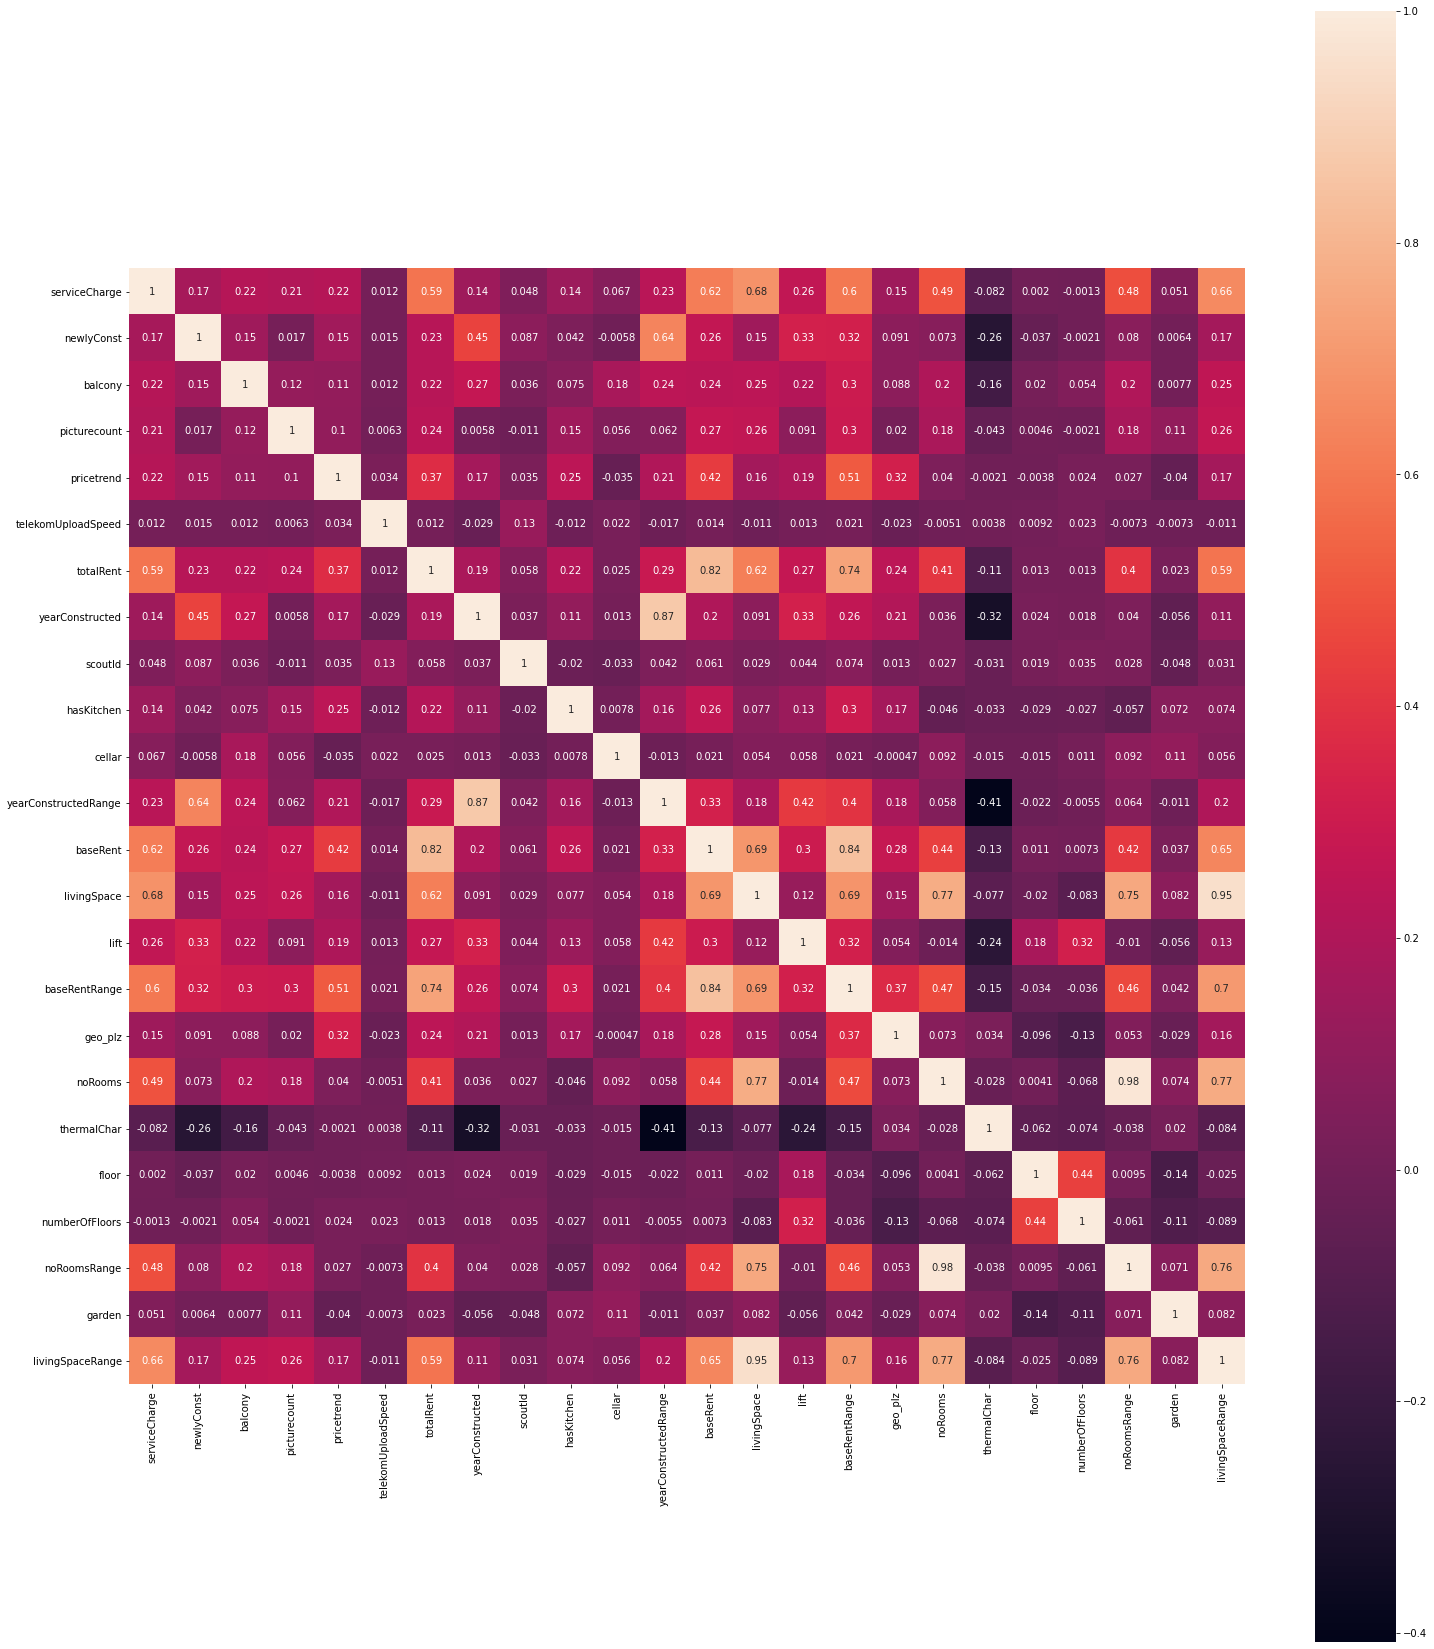

In [29]:
f, ax = plt.subplots(figsize=(25, 30))

sns.heatmap(corr, square = True ,annot = True)

most correlation with livingSpace: livingSpaceRange 0.95
least correlation: numberOfFloors -0.083

# convert categorical data to dummies variables

In [30]:
columns=[]
for cols in df.columns:
    if df[cols].dtype == 'object' or df[cols].dtype == 'bool':
        columns.append(cols)
        
columns

['regio1',
 'heatingType',
 'telekomTvOffer',
 'newlyConst',
 'balcony',
 'hasKitchen',
 'geo_bln',
 'cellar',
 'condition',
 'interiorQual',
 'petsAllowed',
 'lift',
 'typeOfFlat',
 'garden',
 'firingTypes_edit']

In [31]:
dummies_feature = pd.get_dummies(df[columns])
dummies_feature.head()

,newlyConst,balcony,hasKitchen,cellar,lift,garden,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,regio1_Rheinland_Pfalz,regio1_Saarland,regio1_Sachsen,regio1_Sachsen_Anhalt,regio1_Schleswig_Holstein,regio1_Thüringen,heatingType_central_heating,heatingType_combined_heat_and_power_plant,heatingType_district_heating,heatingType_electric_heating,heatingType_floor_heating,heatingType_gas_heating,heatingType_heat_pump,heatingType_night_storage_heater,heatingType_oil_heating,heatingType_self_contained_central_heating,heatingType_solar_heating,heatingType_stove_heating,heatingType_wood_pellet_heating,telekomTvOffer_NONE,telekomTvOffer_ONE_YEAR_FREE,telekomTvOffer_ON_DEMAND,geo_bln_Baden_Württemberg,geo_bln_Bayern,...,geo_bln_Mecklenburg_Vorpommern,geo_bln_Niedersachsen,geo_bln_Nordrhein_Westfalen,geo_bln_Rheinland_Pfalz,geo_bln_Saarland,geo_bln_Sachsen,geo_bln_Sachsen_Anhalt,geo_bln_Schleswig_Holstein,geo_bln_Thüringen,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_need_of_renovation,condition_negotiable,condition_refurbished,condition_ripe_for_demolition,condition_well_kept,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat,firingTypes_edit_district_heating,firingTypes_edit_gas,firingTypes_edit_oil,firingTypes_edit_other
0,False,False,False,True,False,True,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,False,True,False,False,False,False,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,True,True,False,True,True,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,False,True,False,False,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,False,True,False,False,False,False,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [32]:
df = pd.concat([df, dummies_feature], axis=1)
df.head()

,regio1,serviceCharge,heatingType,telekomTvOffer,newlyConst,balcony,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,hasKitchen,geo_bln,cellar,yearConstructedRange,baseRent,livingSpace,condition,interiorQual,petsAllowed,lift,baseRentRange,typeOfFlat,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,garden,livingSpaceRange,firingTypes_edit,newlyConst,balcony,hasKitchen,cellar,lift,garden,regio1_Baden_Württemberg,...,geo_bln_Mecklenburg_Vorpommern,geo_bln_Niedersachsen,geo_bln_Nordrhein_Westfalen,geo_bln_Rheinland_Pfalz,geo_bln_Saarland,geo_bln_Sachsen,geo_bln_Sachsen_Anhalt,geo_bln_Schleswig_Holstein,geo_bln_Thüringen,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_need_of_renovation,condition_negotiable,condition_refurbished,condition_ripe_for_demolition,condition_well_kept,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat,firingTypes_edit_district_heating,firingTypes_edit_gas,firingTypes_edit_oil,firingTypes_edit_other
0,Nordrhein_Westfalen,0.308220,central_heating,ONE_YEAR_FREE,False,False,-0.591717,0.628648,-1.229879e+00,-2.002236e-03,-0.033579,-0.868944,False,Nordrhein_Westfalen,True,-0.705474,-0.005074,0.045708,well_kept,normal,negotiable,False,0.106010,ground_floor,0.251312,0.515956,1.391175e+00,-3.432713e-01,-1.125204e-01,1.523536,True,0.660359,oil,False,False,False,True,False,True,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,Rheinland_Pfalz,-0.056542,self_contained_central_heating,ONE_YEAR_FREE,False,True,-0.279627,0.041365,-1.229879e+00,1.060728e-14,-2.287243,0.352699,False,Rheinland_Pfalz,False,-1.116939,0.005419,0.057484,refurbished,normal,no,False,0.557608,ground_floor,1.085543,0.136224,1.341014e-12,1.113710e-13,1.296553e-12,0.456976,False,0.660359,gas,False,True,False,False,False,False,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,Sachsen,0.341081,floor_heating,ONE_YEAR_FREE,True,True,-0.279627,-0.341646,-1.726934e+00,1.301498e-02,1.261079,0.494191,False,Sachsen,True,2.174778,0.013865,0.037072,first_time_use,sophisticated,negotiable,True,1.009207,apartment,-1.301747,0.136224,1.341014e-12,2.684000e-01,8.408414e-02,0.456976,False,0.660359,gas,True,True,False,True,True,False,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Sachsen,-0.305795,district_heating,ONE_YEAR_FREE,False,True,-0.123581,-0.949357,7.321796e-01,1.060728e-14,-0.057555,0.153687,False,Sachsen,False,-0.705474,-0.017973,-0.063611,well_kept,normal,negotiable,False,-0.797187,other,-0.995898,0.136224,-6.000803e-01,2.684000e-01,1.296553e-12,0.456976,False,-0.760976,district_heating,False,True,False,False,False,False,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,Bremen,-0.043397,self_contained_central_heating,ONE_YEAR_FREE,False,True,1.436871,-0.474423,-2.156249e-13,5.446935e-05,-0.393207,0.622478,False,Bremen,False,-1.116939,0.003628,0.041665,refurbished,normal,negotiable,False,0.557608,apartment,-0.326283,0.136224,1.547720e+00,-3.432713e-01,1.296553e-12,0.456976,False,0.660359,gas,False,True,False,False,False,False,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [33]:
df = df.drop(columns=columns)
df.head()

,serviceCharge,picturecount,pricetrend,telekomUploadSpeed,totalRent,yearConstructed,scoutId,yearConstructedRange,baseRent,livingSpace,baseRentRange,geo_plz,noRooms,thermalChar,floor,numberOfFloors,noRoomsRange,livingSpaceRange,regio1_Baden_Württemberg,regio1_Bayern,regio1_Berlin,regio1_Brandenburg,regio1_Bremen,regio1_Hamburg,regio1_Hessen,regio1_Mecklenburg_Vorpommern,regio1_Niedersachsen,regio1_Nordrhein_Westfalen,regio1_Rheinland_Pfalz,regio1_Saarland,regio1_Sachsen,regio1_Sachsen_Anhalt,regio1_Schleswig_Holstein,regio1_Thüringen,heatingType_central_heating,heatingType_combined_heat_and_power_plant,heatingType_district_heating,heatingType_electric_heating,heatingType_floor_heating,heatingType_gas_heating,...,geo_bln_Mecklenburg_Vorpommern,geo_bln_Niedersachsen,geo_bln_Nordrhein_Westfalen,geo_bln_Rheinland_Pfalz,geo_bln_Saarland,geo_bln_Sachsen,geo_bln_Sachsen_Anhalt,geo_bln_Schleswig_Holstein,geo_bln_Thüringen,condition_first_time_use,condition_first_time_use_after_refurbishment,condition_fully_renovated,condition_mint_condition,condition_modernized,condition_need_of_renovation,condition_negotiable,condition_refurbished,condition_ripe_for_demolition,condition_well_kept,interiorQual_luxury,interiorQual_normal,interiorQual_simple,interiorQual_sophisticated,petsAllowed_negotiable,petsAllowed_no,petsAllowed_yes,typeOfFlat_apartment,typeOfFlat_ground_floor,typeOfFlat_half_basement,typeOfFlat_loft,typeOfFlat_maisonette,typeOfFlat_other,typeOfFlat_penthouse,typeOfFlat_raised_ground_floor,typeOfFlat_roof_storey,typeOfFlat_terraced_flat,firingTypes_edit_district_heating,firingTypes_edit_gas,firingTypes_edit_oil,firingTypes_edit_other
0,0.308220,-0.591717,0.628648,-1.229879e+00,-2.002236e-03,-0.033579,-0.868944,-0.705474,-0.005074,0.045708,0.106010,0.251312,0.515956,1.391175e+00,-3.432713e-01,-1.125204e-01,1.523536,0.660359,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
1,-0.056542,-0.279627,0.041365,-1.229879e+00,1.060728e-14,-2.287243,0.352699,-1.116939,0.005419,0.057484,0.557608,1.085543,0.136224,1.341014e-12,1.113710e-13,1.296553e-12,0.456976,0.660359,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
2,0.341081,-0.279627,-0.341646,-1.726934e+00,1.301498e-02,1.261079,0.494191,2.174778,0.013865,0.037072,1.009207,-1.301747,0.136224,1.341014e-12,2.684000e-01,8.408414e-02,0.456976,0.660359,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
3,-0.305795,-0.123581,-0.949357,7.321796e-01,1.060728e-14,-0.057555,0.153687,-0.705474,-0.017973,-0.063611,-0.797187,-0.995898,0.136224,-6.000803e-01,2.684000e-01,1.296553e-12,0.456976,-0.760976,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
4,-0.043397,1.436871,-0.474423,-2.156249e-13,5.446935e-05,-0.393207,0.622478,-1.116939,0.003628,0.041665,0.557608,-0.326283,0.136224,1.547720e+00,-3.432713e-01,1.296553e-12,0.456976,0.660359,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [34]:
df.shape

(250467, 97)

# Linear Regression Models:

### univariate linear regression

In [109]:
def estimate_coef(x, y):
  n = len(x)
  x_mean = np.mean(x)
  y_mean = np.mean(y)

  numerator = 0
  denominator = 0
  for i in range(n):
      numerator += (x[i] - x_mean) * (y[i] - y_mean)
      denominator += (x[i] - x_mean) ** 2

  b1 = numerator / denominator
  b0 = y_mean - (b1 * x_mean)
  
  return (b0, b1)

In [110]:
def predict (x, b):
    n = len(x)
    y_pred = []
    for i in range(n):
        y_pred.append(b[0] + b[1] * x[i])
    return y_pred

In [111]:
def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
               marker = "o", s = 30)
 
    # predicted response vector
    y_pred = predict(x, b)
    # plotting the regression line
    plt.plot(x, y_pred, color = "g")
 
    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')
 
    # function to show plot
    plt.show()

In [112]:
def mse(y, y_pred):
    n = len(y)
    mse = 0
    for i in range(n):
        mse += (y[i] - y_pred[i]) ** 2
    mse = mse/n
    return rmse

univariate linear regression with most correlated feature i.e. "livingSpaceRange"

In [149]:
x = df['livingSpaceRange'].values
y = df['livingSpace'].values

In [114]:
x.shape

(250467,)

In [115]:
y.shape

(250467,)

In [116]:
estimate_coef(x, y)

(-0.0038522829667690835, 0.11781043937009138)

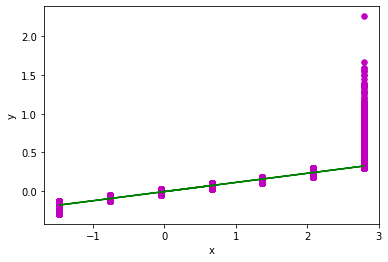

In [117]:
b = estimate_coef(x, y)
plot_regression_line(x, y, b)

In [118]:
y_pred = predict(x, b)
mse(y, y_pred)

0.0014310303461699393

# multi variate linear regression

In [160]:
class SimpleLinearRegression() : 
      
    def __init__( self, learning_rate, iterations ) : 
          
        self.learning_rate = learning_rate 
          
        self.iterations = iterations 
    def fit(self, X, Y):
      X_train = np.c_[np.ones(X.shape[0]), X]
      self.W = np.random.rand((X_train.shape[1]))
      for i in range(self.iterations):
        self.W = self.W - self.learning_rate * self.calcGradient(X_train, Y)

    def calcGradient(self, X, Y):
      return 2/X.shape[0] * np.dot(X.T, (np.dot(X, self.W) - Y))

    def predict(self, X):
      Xpred = np.c_[np.ones(X.shape[0]), X]
      return np.dot(Xpred, self.W)

# split features and target

In [222]:
y = df['livingSpace']
X = df.drop(columns = ['livingSpace'])

print(X.shape)
print(y.shape)

(250467, 96)
(250467,)


In [223]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0 ) 

In [224]:
model = SimpleLinearRegression(iterations = 1000, learning_rate = 0.01)

In [225]:
model.fit(X_train, y_train)

In [226]:
y_pred = model.predict(X_test)

In [227]:
from sklearn.metrics import mean_squared_error
print(f'MSE on the test set: {mean_squared_error(y_test, y_pred)}')

MSE on the test set: 0.03163200605563776


# sklearn linear regression

In [228]:
from sklearn.linear_model import LinearRegression

In [229]:
reg = LinearRegression()

In [230]:
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [231]:
reg.score(X_test, y_test)

0.9316068694373152

In [55]:
reg_y_pred = reg.predict(X_test)

In [232]:
print(f'MSE on the test set: {mean_squared_error(y_test,reg_y_pred)}')

MSE on the test set: 0.001016540850307859


# K-Fold Cross-Valodation

In [161]:
from sklearn.model_selection import KFold

In [179]:
def kFold_CV(k, X, y):
  kfold = KFold(k, True, 1)
  reg_model = LinearRegression()

  mean_mse = 0
  for train_index, test_index in kfold.split(X):
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]
     reg_model.fit(X_train, y_train)
     reg_model_y_pred = reg_model.predict(X_test)
     mean_mse += mean_squared_error(y_test, reg_model_y_pred)
     print(f'MSE on the test set: {mean_squared_error(y_test, reg_model_y_pred)}')
  print(f'Mean MSEs on the test sets: {mean_mse/k}')

In [187]:
def kFold_CV2(k, X, y):
  kfold = KFold(k, True, 1)
  mean_mse = 0
  for train_index, test_index in kfold.split(X):
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]

     b = estimate_coef(X_train, y_train)
     y_pred = predict(X_test, b)
     mean_mse += mse(y_test, y_pred)
     print(f'MSE on the test set: {mse(y_test, y_pred)}')
  print(f'Mean MSEs on the test sets: {mean_mse/k}')

### part 1:

In [190]:
X1 = df['livingSpaceRange'].values
X1 = X1.reshape(-1, 1)
y1 = df['livingSpace'].values
kFold_CV2(5, X1, y1)

MSE on the test set: 0.0014310303461699393
MSE on the test set: 0.0014310303461699393
MSE on the test set: 0.0014310303461699393
MSE on the test set: 0.0014310303461699393
MSE on the test set: 0.0014310303461699393
Mean MSEs on the test sets: 0.0014310303461699393


In [191]:
kFold_CV2(10, X1, y1)

MSE on the test set: 0.0014310303461699393
MSE on the test set: 0.0014310303461699393
MSE on the test set: 0.0014310303461699393
MSE on the test set: 0.0014310303461699393
MSE on the test set: 0.0014310303461699393
MSE on the test set: 0.0014310303461699393
MSE on the test set: 0.0014310303461699393
MSE on the test set: 0.0014310303461699393
MSE on the test set: 0.0014310303461699393
MSE on the test set: 0.0014310303461699393
Mean MSEs on the test sets: 0.0014310303461699395


### part 2:

In [180]:
kFold_CV(5, X1, y1)

MSE on the test set: 0.0014013380212492305
MSE on the test set: 0.0014063516080364974
MSE on the test set: 0.0014926947364295937
MSE on the test set: 0.0014739624957834584
MSE on the test set: 0.001381065420135311
Mean MSEs on the test sets: 0.001431082456326818


In [186]:
kFold_CV(10, X1, y1)

MSE on the test set: 0.0015179439221928972
MSE on the test set: 0.0012848612653289973
MSE on the test set: 0.0014475766031993487
MSE on the test set: 0.001365071599097838
MSE on the test set: 0.0014582953459220708
MSE on the test set: 0.0015271852790737206
MSE on the test set: 0.0015462075585231205
MSE on the test set: 0.0014016009090330776
MSE on the test set: 0.001457868870535493
MSE on the test set: 0.0013042193044963406
Mean MSEs on the test sets: 0.0014310830657402905


### part 3:

two most correlated features:  1.livingSpaceRange 2.noRooms


two least correlated features: 1.thermalChar  2.numberOfFloors

In [182]:
X3 = df[['livingSpaceRange', 'noRooms', 'thermalChar','numberOfFloors']].values
y3 = df['livingSpace'].values
kFold_CV(5, X3, y3)

MSE on the test set: 0.0013378831605116075
MSE on the test set: 0.0013478809356637558
MSE on the test set: 0.001419128130595827
MSE on the test set: 0.0013926241179610087
MSE on the test set: 0.001318716914099375
Mean MSEs on the test sets: 0.0013632466517663148


In [183]:
kFold_CV(10, X3, y3)

MSE on the test set: 0.0014467565334352265
MSE on the test set: 0.0012292261105447168
MSE on the test set: 0.001398181507420893
MSE on the test set: 0.001297507475358853
MSE on the test set: 0.0013873723748710695
MSE on the test set: 0.0014509809067086376
MSE on the test set: 0.0014514844205513748
MSE on the test set: 0.0013335024612554658
MSE on the test set: 0.0014009704982155943
MSE on the test set: 0.0012363933503696778
Mean MSEs on the test sets: 0.0013632375638731509


### part 4:

In [184]:
X4 = df.drop(columns=['livingSpace']).values
y4 = df['livingSpace'].values
kFold_CV(5, X4, y4)

MSE on the test set: 0.001122805042763631
MSE on the test set: 0.001028970146840462
MSE on the test set: 0.0010612095287429527
MSE on the test set: 0.0010354805111958943
MSE on the test set: 0.0010376068099220142
Mean MSEs on the test sets: 0.0010572144078929908


In [185]:
kFold_CV(10, X4, y4)

MSE on the test set: 0.00117018495771325
MSE on the test set: 0.0010180738822800157
MSE on the test set: 0.001070483078698131
MSE on the test set: 0.0009864633819172037
MSE on the test set: 0.0010278348098713749
MSE on the test set: 0.0010906622708951978
MSE on the test set: 0.0010865076192318448
MSE on the test set: 0.000979193627694081
MSE on the test set: 0.0011300079429694269
MSE on the test set: 0.0009438397288684028
Mean MSEs on the test sets: 0.0010503251300138928


# Ridge Regression

## part 5:

In [200]:
from numpy import mean
from numpy import std
from numpy import absolute
 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

### Ridge Regression k_Fold CV

In [205]:
ridge_regression_model = Ridge(alpha=1.0)

cv = KFold(10, True, 1)
cv2 = KFold(5, True, 1)

scores = cross_val_score(ridge_regression_model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores2 = cross_val_score(ridge_regression_model, X, y, scoring='neg_mean_squared_error', cv=cv2, n_jobs=-1)

scores = absolute(scores)
scores2 = absolute(scores2)

print('10 Fold:Mean MSE: %.3f (%.3f)' % (mean(scores), std(scores)))
print('5 Fold:Mean MSE: %.3f (%.3f)' % (mean(scores2), std(scores2)))

10 Fold:Mean MSE: 0.001 (0.000)
5 Fold:Mean MSE: 0.001 (0.000)


### Ridge Regression Repeated K-Fold CV

In [204]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

scores = cross_val_score(ridge_regression_model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)

scores = absolute(scores)
print('Repeated 10 fold:Mean MSE: %.3f (%.3f)' % (mean(scores), std(scores)))

Repeated 10 fold:Mean MSE: 0.001 (0.000)


### Ridge Regression with different alphas

In [233]:
alphas = [0.001, 0.01, 0.1, 1, 10]
print('All errors are MSE')
print('-'*76)
for alpha in alphas:
    ridge = Ridge(alpha=alpha, fit_intercept=True, random_state=99)
    ridge.fit(X_train, y_train)
    new_train_error = mean_squared_error(y_train, ridge.predict(X_train))
    new_test_error = mean_squared_error(y_test, ridge.predict(X_test))
    # print errors as report
    print('alpha: {:7} | train error: {:5} | test error: {}'.
          format(alpha,
                 round(new_train_error,3),
                 round(new_test_error,3)))

All errors are MSE
----------------------------------------------------------------------------
alpha:   0.001 | train error: 0.001 | test error: 0.001
alpha:    0.01 | train error: 0.001 | test error: 0.001
alpha:     0.1 | train error: 0.001 | test error: 0.001
alpha:       1 | train error: 0.001 | test error: 0.001
alpha:      10 | train error: 0.001 | test error: 0.001


# Lasso Regression

## part 6:

### Lasso Regression K-Fold CV

In [236]:
lasso_regression_model = Lasso(alpha=1.0, fit_intercept=True, random_state=77)
    

cv = KFold(10, True, 1)
cv2 = KFold(5, True, 1)

scores = cross_val_score(lasso_regression_model, X, y, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
scores2 = cross_val_score(lasso_regression_model, X, y, scoring='neg_mean_squared_error', cv=cv2, n_jobs=-1)

scores = absolute(scores)
scores2 = absolute(scores2)

print('10 Fold:Mean MSE: %.3f (%.3f)' % (mean(scores), std(scores)))
print('5 Fold:Mean MSE: %.3f (%.3f)' % (mean(scores2), std(scores2)))

10 Fold:Mean MSE: 0.015 (0.000)
5 Fold:Mean MSE: 0.015 (0.000)


### Lasso with different alphas:

In [239]:
alphas = [1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1]

val_errors = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, fit_intercept=True, random_state=77)
    errors = np.sum(-cross_val_score(lasso, 
                                     X, 
                                     y=y, 
                                     scoring='neg_mean_squared_error', 
                                     cv=10, 
                                     n_jobs=-1))
    val_errors.append(np.sqrt(errors))

In [240]:
print(val_errors)

[0.1056353727523924, 0.1142056205630738, 0.12310714949502266, 0.341178286575496, 0.3876513014543515, 0.3876513014543515]


In [241]:
print('best alpha: {}'.format(alphas[np.argmin(val_errors)]))

best alpha: 0.0001
